# **Cab Industry Investment**

# **Business Problem**

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

# **Datasets Source**

The four datasets are for two cab companies. They are collected between       02/01/2016 to 31/12/2018.

# **Hypothesis Studied**


1. Does the profit of each company change yearly for each city ?
2.   What percentage of contribution in city average profit for males and females?
3.   Is there any seasonality in the profit per month for each comapny?
4. Does demand tend to increase over time?
5. Which company is travelling more distances?
6. Does the two companies maintain the same average profit per Km for all cities?
7. On average, what is the change in the profit per Km yearwise and monthwise?
8. Who has the highest average income withe respect to age and gender? 







# **Import Modules**

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure

# **Load Data**

In [62]:
cab = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv' )
customer = pd.read_csv('Customer_ID.csv' )
transaction = pd.read_csv('Transaction_ID.csv')

# **Arrtibutes Types**

Let us understand the attributes in each dataset.

**Cab_Data.csv:**

Transaction ID : ID of customer transaction. (Integer)

Date of Travel : Date of trip. (Date)

Company : Cab company. (String)

City : City of travel. (String)

KM Travelled : Distance to travel. (Float)

Price Charged : Money to be paid by customer. (Float)

Cost of Trip : Cost of the trip. (Float)

**City.csv:**

City : City name. (String)

Population : Population of the city. (String) 

Users : Number of cab users in the city. (String)

**Customer_ID.csv:**

Customer ID : ID of the customer. (Integer)

Gender : Customer gender. (String)

Age : Customer age. (Integer)

Income (USD/Month) : Income of each Customer. (Integer)

**Transaction_ID.csv:**

Transaction ID : ID of the transaction. (Integer)

Customer ID : ID of the customer. (Integer)

Payment Mode : Method of payment (Cash, Card). (String)


In [63]:
cab.info()
print('\n')
city.info()
print('\n')
customer.info()
print('\n')
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entrie

# **Unique Values**

Let us check for duplicates.


*   We have 359392 rows in Cab_Data.csv file and 359392 values for Transaction ID. (No Duplicates)
*   We have 1095 different Date of Travel values in Cab_Data.csv file. it is normal as many trips can happen during the day. 
*   We have 49171 rows in Customer_ID.csv file and 49171 values for Customer ID. (No Duplicates)
*   We have 440098 rows in Transaction_ID.csv file and 49171 values for Customer ID. it means a single customer can have multiple transactions.
*   We have 440098 rows in Transaction_ID.csv file and 440098 values for Transaction ID. (No Duplicates)
*   We have 20 cities in City.csv file, but 19 cities in Cab_Data.csv file. the only missing city is SAN FRANCISCO.







In [64]:

print('number of unique transaction IDs in the cab dataset : {0}'. format(len(cab['Transaction ID'].unique())))
print('number of unique Date of Travel in the cab dataset : {0}'. format(len(cab['Date of Travel'].unique())))
print('number of unique Customer IDs in the customer dataset : {0}'. format(len(customer['Customer ID'].unique())))
print('number of unique Customer IDs in the transaction dataset : {0}'. format(len(transaction['Customer ID'].unique())))
print('number of unique transaction IDs in the transaction dataset : {0}'. format(len(transaction['Transaction ID'].unique())))
print('number of unique Cities in the cab dataset : {0}'. format(len(cab['City'].unique())))
print('number of unique Cities in the city dataset : {0}'. format(len(city['City'].unique())))

number of unique transaction IDs in the cab dataset : 359392
number of unique Date of Travel in the cab dataset : 1095
number of unique Customer IDs in the customer dataset : 49171
number of unique Customer IDs in the transaction dataset : 49171
number of unique transaction IDs in the transaction dataset : 440098
number of unique Cities in the cab dataset : 19
number of unique Cities in the city dataset : 20


# **Check for Missing Values**

There are no missing data.

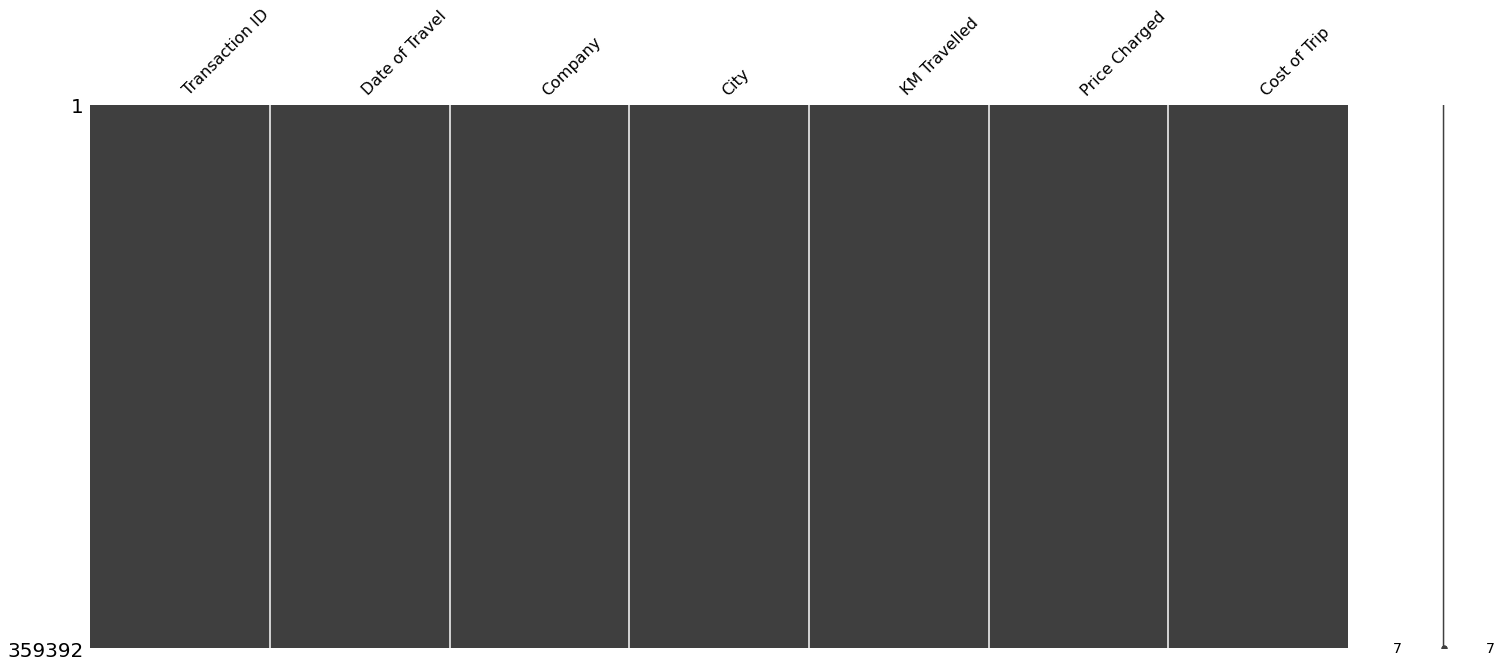

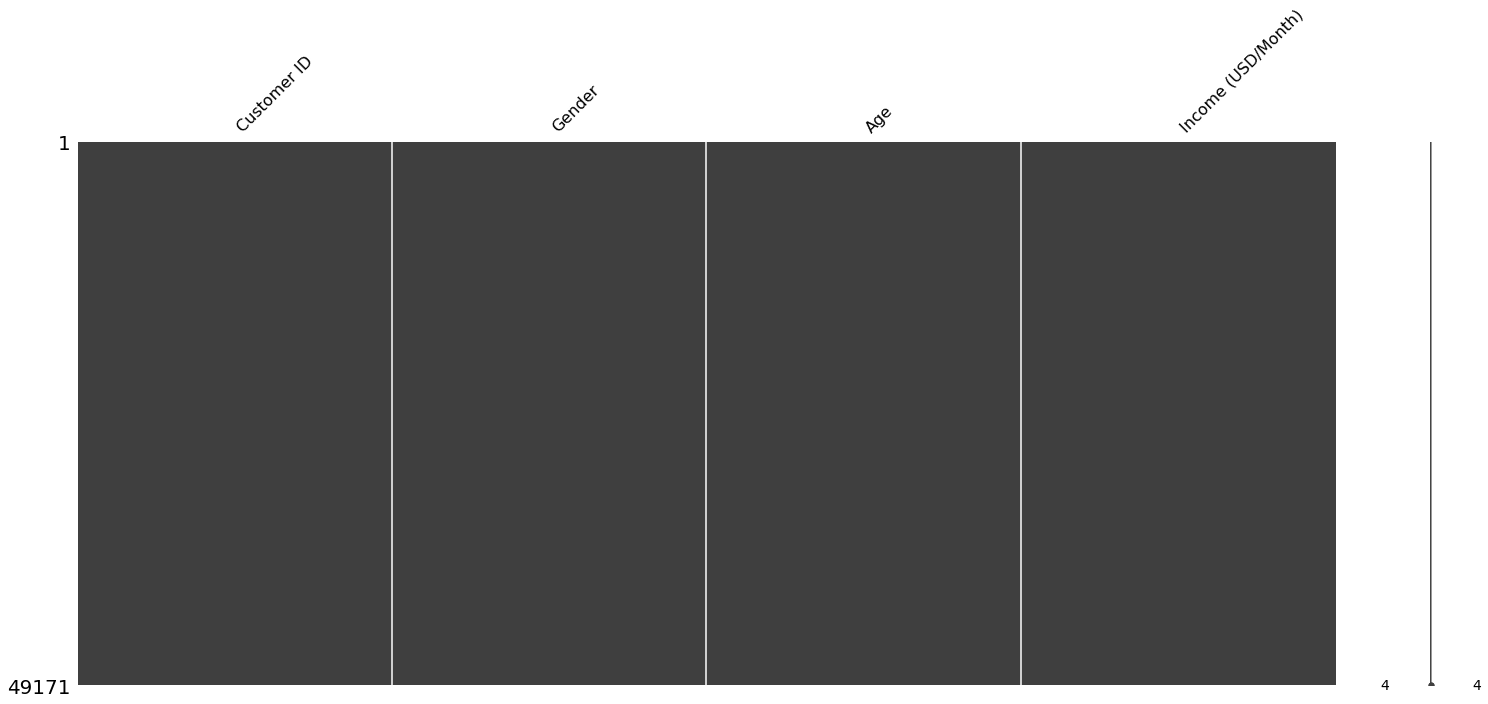

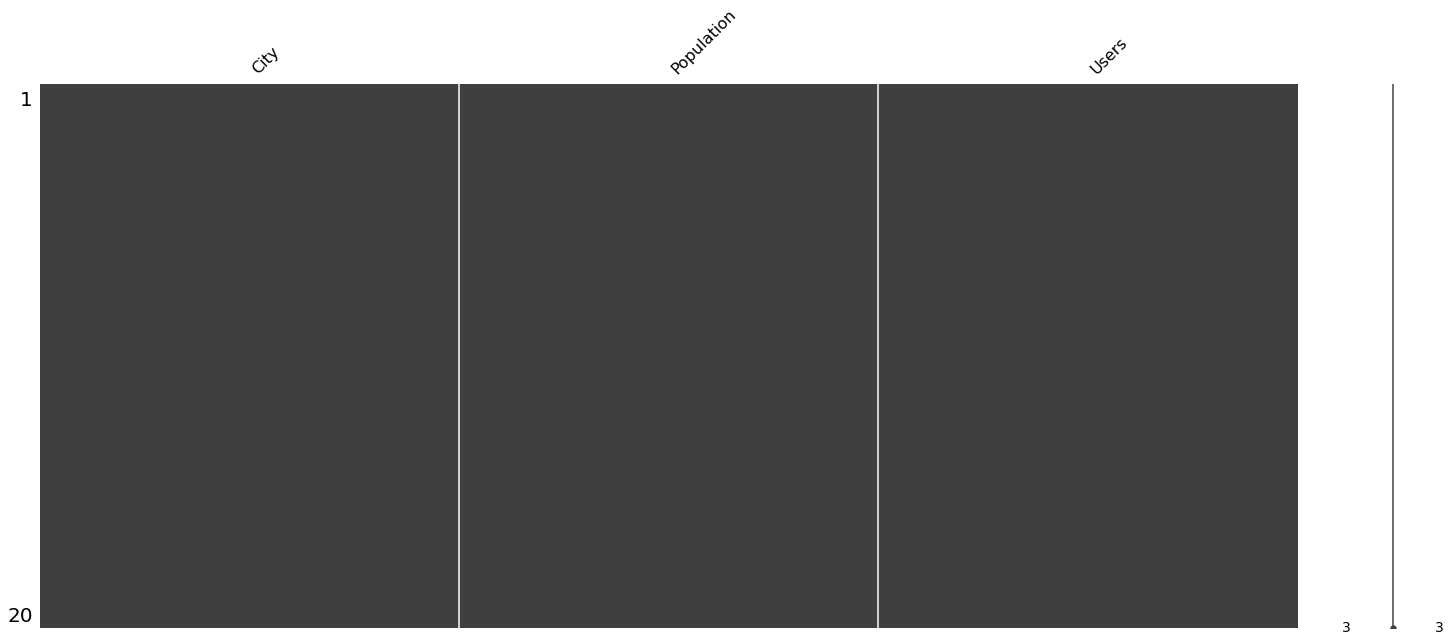

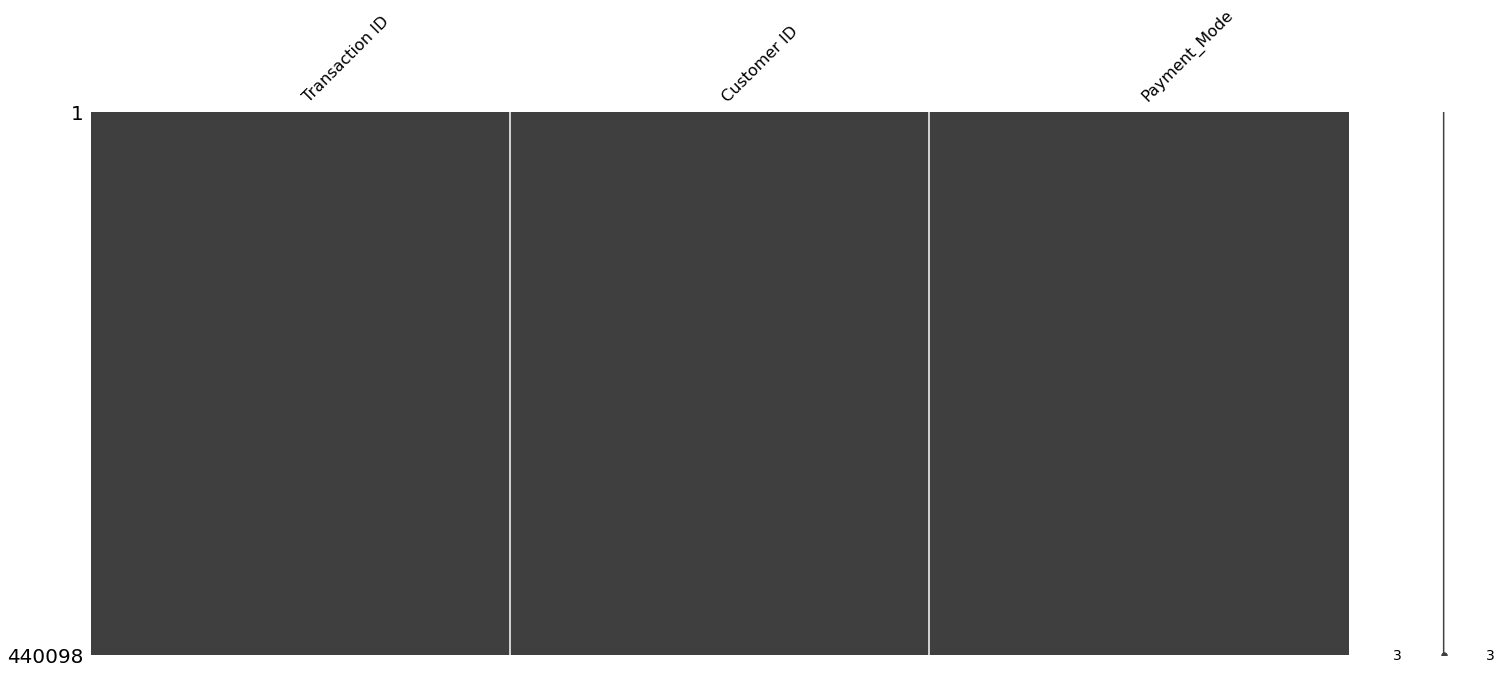

In [65]:
import missingno as mn
mn.matrix(cab)
mn.matrix(customer)
mn.matrix(city)
mn.matrix(transaction)

# **Create Master Dataset**

Let us understand the relationships across the files to decide if:


*   we want to join or append some of them.
*   create a master dataset to focus on instead of scattering.

According to the mentioned attributes, there is no way of appending any files. This is because there are no two files with the same set of attributes.

We know that relationships can be one-to-one , one-to-many, and many-to-many.
By looking at Transaction_ID.csv file, there is a one-to-many relationship between Customer ID and Transaction ID as a single customer can have multiple transaction (using cabs several times).

We formed a master dataset for better analysis by applying these steps:


*   	Cab_Data.csv and City.csv files are merged using inner join to include the city information. They are merged by city attribute. We call it cab_city dataset.
*   Customer_ID.csv and Transaction_ID.csv files are merged using inner join to include the customer information. They are merged by customer ID attribute. We call it cust_trans dataset.
*   Finally, cab_city and cust_trans dataframes are merged using inner join by Transaction ID attribute. We call it Master dataset.

This Master dataset contains 359392 rows and 14 features (attributes).







In [66]:
cab_city = pd.merge(cab , city , on = "City")
cust_trans = pd.merge(customer , transaction , on = "Customer ID")

Master = pd.merge(cab_city , cust_trans ,  on = "Transaction ID")

# **Modify Attributes' Names**

In [67]:
for col in Master.columns:
    if ' ' in col:
        Master = Master.rename(columns={col:col.replace(' ','_')})

# **Change Data Type**

By looking at the Master dataset, we found that Population and Users attributes are of type string. We have to change them to integer type for accurate interpretation.

In [68]:
Master.info()
#converting the date format into standard date format
Master['Date_of_Travel'] = pd.to_datetime(Master['Date_of_Travel'])
Master['Year'] = Master['Date_of_Travel'].dt.year #adding a new 'Year' column
Master['Month'] = Master['Date_of_Travel'].dt.month #adding a new 'Month' column

Master = Master.drop(['Date_of_Travel'], axis =1 )

Master['Population'] = Master['Population'].str.strip().str.replace("," , "")
Master['Users'] = Master['Users'].str.strip().str.replace("," , "")

Master['Population'] = Master['Population'].astype(int)
Master['Users'] = Master['Users'].astype(int)

#rename Income attribute
Master['Income_(USD/Month)'] = Master['Income_(USD/Month)'].astype(float)
Master = Master.rename(columns={"Income_(USD/Month)": "Income"})

print("\n")
Master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction_ID      359392 non-null  int64  
 1   Date_of_Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM_Travelled        359392 non-null  float64
 5   Price_Charged       359392 non-null  float64
 6   Cost_of_Trip        359392 non-null  float64
 7   Population          359392 non-null  object 
 8   Users               359392 non-null  object 
 9   Customer_ID         359392 non-null  int64  
 10  Gender              359392 non-null  object 
 11  Age                 359392 non-null  int64  
 12  Income_(USD/Month)  359392 non-null  int64  
 13  Payment_Mode        359392 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 41.1+ MB


<class 'pandas.core.fram

# **Derived Attributes**

Profit: Money earned by the company.

ProfitPercentage: Percentage of profit from the cost of the trip.

ProfitPerKm: Money earned for each travelled Kilometer.

In [69]:
Master['Profit'] = Master['Price_Charged'] - Master['Cost_of_Trip'] 
Master['ProfitPercentage'] = ((Master['Price_Charged'] - Master['Cost_of_Trip'])/Master['Cost_of_Trip'])*100
Master['ProfitPerKm'] = Master['Profit']/Master['KM_Travelled']



# **Descriptive Numerical Analysis**

We find the statistics of numerical attributes. For example, mean, median, standard deviation, first quartile, third quartile, min, and max.

we can even look for outiliers (if it is possible). observing these measures can reveal some information about the distribution (skewed left or skewed right).

You can see that the range of Price Charged is too high (max-min). So, there are outliers. But, since we do not know enough information (trip duration), we will leave them.


In [70]:
round(Master.describe(include = 'all'), 2)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Gender,Age,Income,Payment_Mode,Year,Month,Profit,ProfitPercentage,ProfitPerKm
count,359392.00,359392,359392,359392.00,359392.00,359392.00,359392.00,359392.00,359392.00,359392,359392.00,359392.00,359392,359392.00,359392.00,359392.00,359392.00,359392.00
unique,NaN,2,19,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN,NaN,Card,NaN,NaN,NaN,NaN,NaN
freq,NaN,274681,99885,NaN,NaN,NaN,NaN,NaN,NaN,205912,NaN,NaN,215504,NaN,NaN,NaN,NaN,NaN
mean,10220761.19,NaN,NaN,22.57,423.44,286.19,3132198.04,158365.58,19191.65,NaN,35.34,15048.82,NaN,2017.05,7.50,137.25,47.52,6.08
std,126805.80,NaN,NaN,12.23,274.38,157.99,3315194.39,100850.05,21012.41,NaN,12.59,7969.41,NaN,0.80,3.45,160.31,42.57,5.54
min,10000011.00,NaN,NaN,1.90,15.60,19.00,248968.00,3643.00,1.00,NaN,18.00,2000.00,NaN,2016.00,1.00,-220.06,-40.93,-5.00
25%,10110809.75,NaN,NaN,12.00,206.44,151.20,671238.00,80021.00,2705.00,NaN,25.00,8424.00,NaN,2016.00,5.00,28.01,16.08,2.00
50%,10221035.50,NaN,NaN,22.44,386.36,282.48,1595037.00,144132.00,7459.00,NaN,33.00,14685.00,NaN,2017.00,8.00,81.96,35.93,4.47
75%,10330937.25,NaN,NaN,32.96,583.66,413.68,8405837.00,302149.00,36078.00,NaN,42.00,21035.00,NaN,2018.00,10.00,190.03,71.27,9.17


In [71]:
#function for drawing the distribution graph
def distribution_graph(dataset, title, x, x_label, color , bins = 40):
    plt.figure(figsize=(14,6))
    ax=sns.histplot(data = dataset, x=x,bins=bins, color= color)
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel(x_label)

# **KM Travel Frequency Distribution**

This graph shows distribution of KM Traveled. The distribution is skewed right. All trips are between 1 KM and 40 KM.

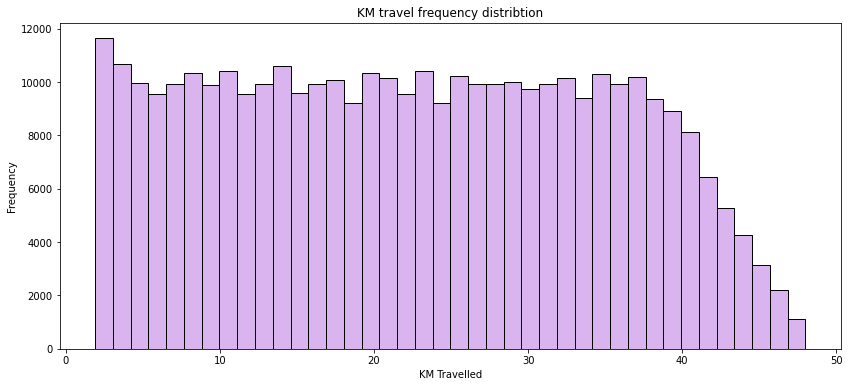

In [72]:

distribution_graph(Master, 'KM travel frequency distribtion', 'KM_Travelled', 'KM Travelled', '#ce9be9' )


# **Price Charged Frequency Distribution**

This graph shows distribution of price Charged. We can see that some the trips have Price Charged over 1000 Dollars. We do not have enough information to decide if these trips are vaild points or not. Again, the distribution is skewed right, where most of the trips have charges between 50 and 500 Dollars.

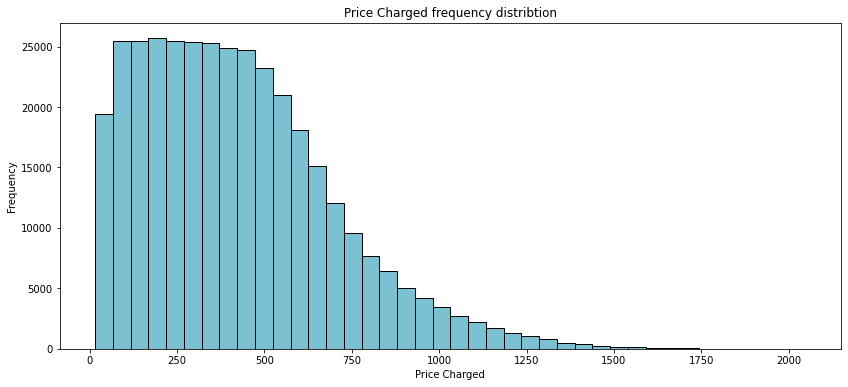

In [73]:
distribution_graph(Master, 'Price Charged frequency distribtion', 'Price_Charged', 'Price Charged', '#50acc3' )


# **Cost of Trip Frequency Distribution**

This graph shows the distribution of Cost of Trip. This is a skewed right distribution, where most of the trips have cost between 20 and 450 Dollars.

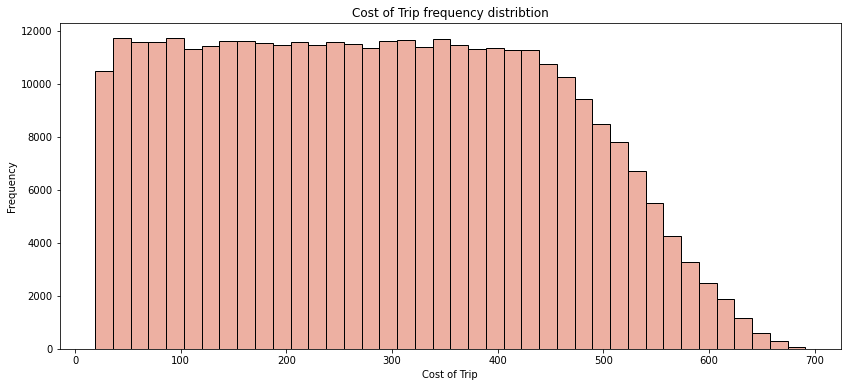

In [74]:
distribution_graph(Master, 'Cost of Trip frequency distribtion', 'Cost_of_Trip', 'Cost of Trip', '#e79683' )


# **Income Frequency Distribution**

This graph shows the distribution of Income. Most of the customers have Income between 2000 and 25000 Dollars.

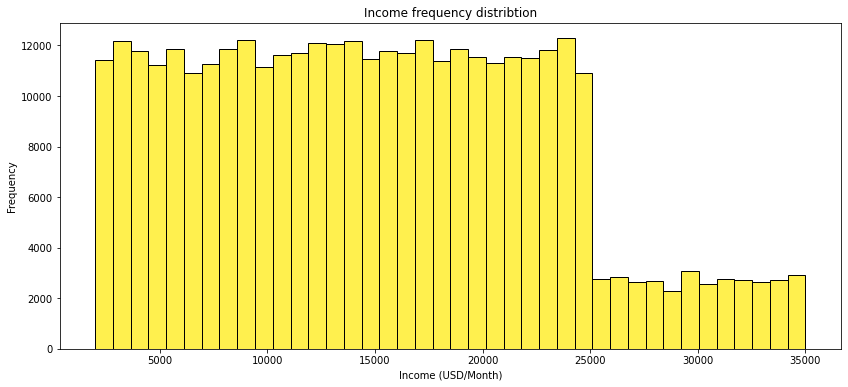

In [75]:
distribution_graph(Master, 'Income frequency distribtion', 'Income', 'Income (USD/Month)', '#ffec12' )

# **Age Frequency Distribution**

From this graph, most of the customers are between 18 and 40.

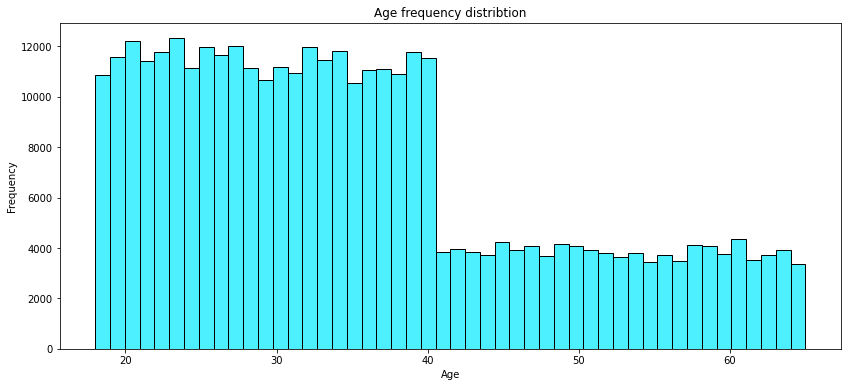

In [76]:
distribution_graph(Master, 'Age frequency distribtion', 'Age', 'Age', '#11ecff' , bins = 48 )

# **Descriptive Categorical Analysis**

In [77]:
#function for drawing the bar plot
def bar_plot(df,variable):
    """
        input: variable ex: "gender"
        output: barplot & valuecount
    """
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    percentage = round((varValue/df.shape[0])*100 , 2)
    plt.figure(figsize = (10 , 7))
    graph = plt.bar(varValue.index , varValue)
    if variable == "City":
        plt.xticks(varValue.index, varValue.index.values, rotation="90")
    elif variable =="Age":
        plt.xticks(varValue.index, varValue.index.values, rotation="90")
    else:
        plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    i = 0
    for p in graph:
      width = p.get_width()
      height = p.get_height()
      x, y = p.get_xy()
      plt.text(x+width/2,
             y+height*1.03,
             str(percentage.iloc[i])+'%',
             ha='center',
             weight='bold',
             fontsize = 10,
             rotation = 90)
      i+=1

    plt.show()
    print("{}: \n {}".format(variable,varValue))

# **Counts of Gender**

This plot shows the count of males and females in the Master dataset. About 58% of customers are males.

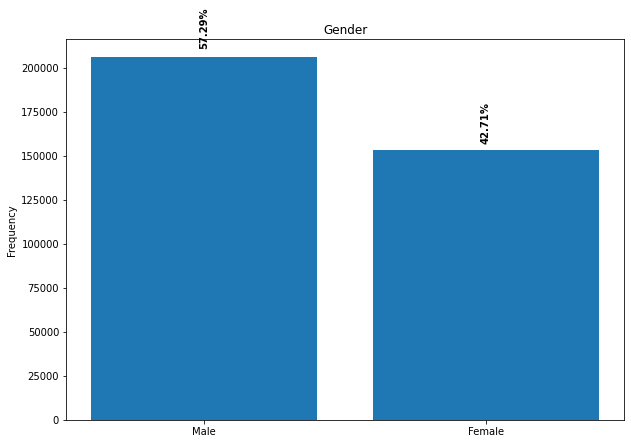

Gender: 
 Male      205912
Female    153480
Name: Gender, dtype: int64


In [78]:
bar_plot(Master , 'Gender')

# **Counts of Gender per City**

Clearly, Males are dominant in NEW YORK, WASHINGTON, CHICAGO, BOSTON, and LOS ANGLES. About 29% of males and 25.8% of females are in NEW YORK.

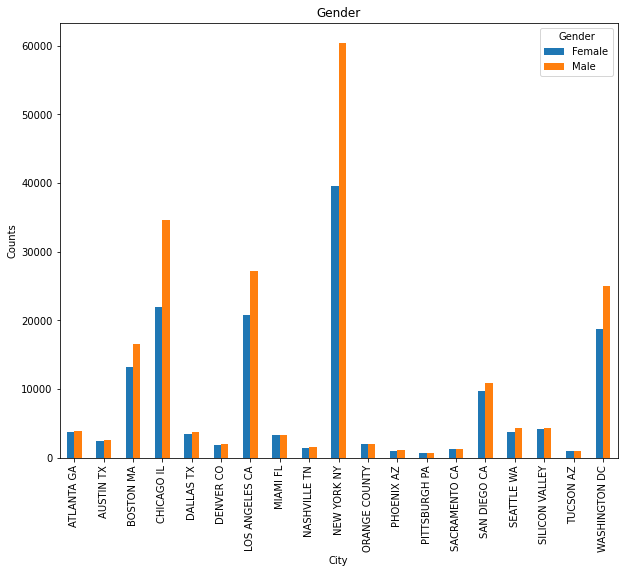

Gender          Female   Male
City                         
ATLANTA GA        3724   3833
AUSTIN TX         2397   2499
BOSTON MA        13163  16529
CHICAGO IL       21988  34637
DALLAS TX         3366   3651
DENVER CO         1850   1975
LOS ANGELES CA   20789  27244
MIAMI FL          3217   3237
NASHVILLE TN      1430   1580
NEW YORK NY      39551  60334
ORANGE COUNTY     1948   2034
PHOENIX AZ        1020   1044
PITTSBURGH PA      672    641
SACRAMENTO CA     1191   1176
SAN DIEGO CA      9622  10866
SEATTLE WA        3724   4273
SILICON VALLEY    4231   4288
TUCSON AZ          914   1017
WASHINGTON DC    18683  25054


In [101]:
counts = Master.groupby(['City','Gender']).Transaction_ID.count().unstack()
ax = counts.plot(kind='bar',stacked = False , figsize = (10 , 8))
ax.set_title("Gender")
ax.set_ylabel("Counts")
plt.show()
print(counts)

# **Counts of Payment Method**

This graph shows the count of the payment method (cash or card). Almost 60% of the users tend to pay by using cards. It is a good thing that these companies provide card payment for more flexibility.

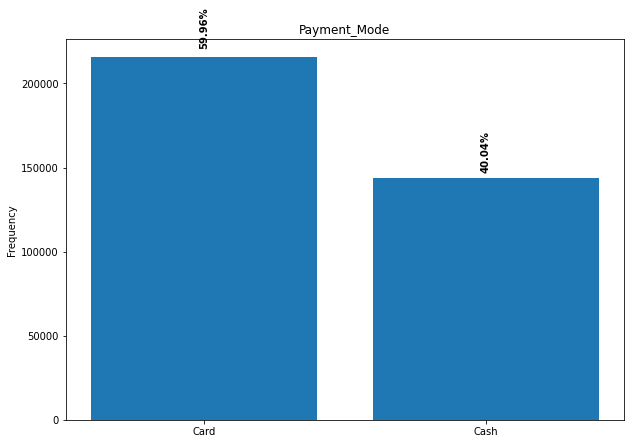

Payment_Mode: 
 Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64


In [80]:
bar_plot(Master , 'Payment_Mode')

# **City Trips**

This Plot shows the number of trips in each city. Apparently, New Yrok, Chicago, Los Angles, and Washington are the most dominant cities. They occupy around 69% of all trips.

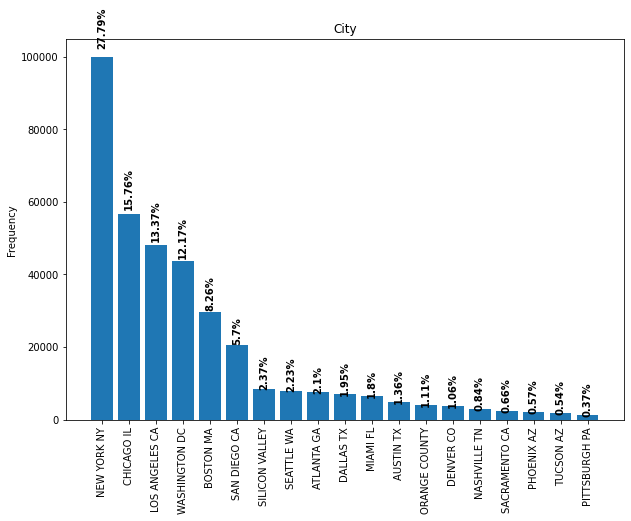

City: 
 NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64


In [81]:
bar_plot(Master , 'City')

# **Company Trips**

This graph shows Number of trips per company. Clearly, about 76% of all trips are fulfilled by Yellow Cab company.

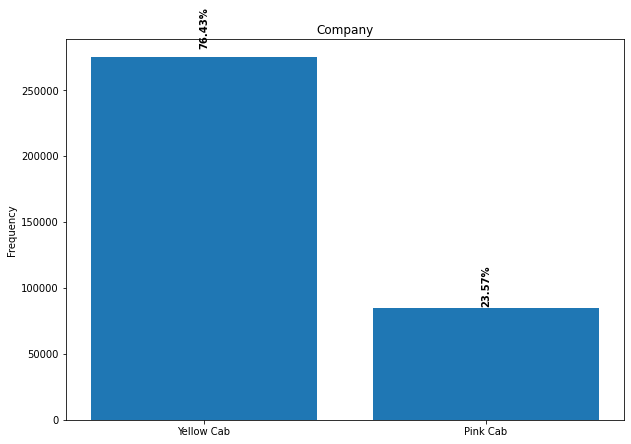

Company: 
 Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64


In [82]:
bar_plot(Master , 'Company')

# **Monthly Trips**

According to the graph, about 46.6% of all trips take place during the last four months. Maximum trips happen in December and become at minimum in February.

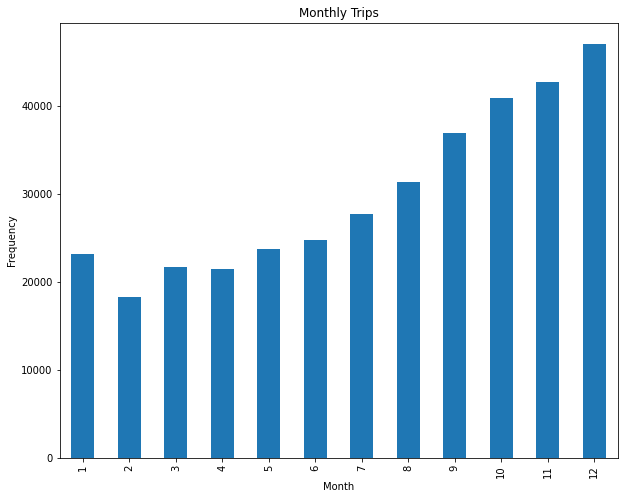

Month
1     23174
2     18307
3     21646
4     21434
5     23701
6     24713
7     27676
8     31323
9     36859
10    40852
11    42700
12    47007
Name: Transaction_ID, dtype: int64


In [83]:
counts = Master.groupby(['Month']).Transaction_ID.count()
ax = counts.plot(kind='bar',stacked = False , figsize = (10 , 8))
ax.set_title("Monthly Trips")
ax.set_ylabel("Frequency")
plt.show()
print(counts)

# **Ratio of Cab Users to City Population**

This graph shows the number of cab users in each city as a precentage of the whole city population.  We can see that in Boston and Washington, about one third of the population are using cab.

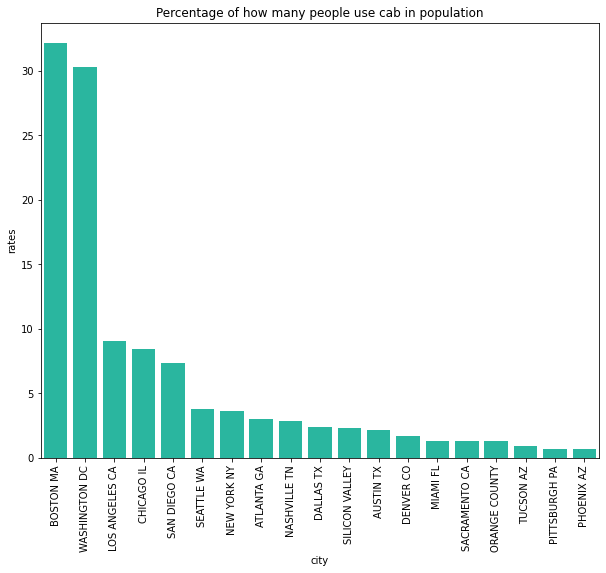

                  City  Rates
25780        BOSTON MA  32.14
328212   WASHINGTON DC  30.32
125914  LOS ANGELES CA   9.04
61005       CHICAGO IL   8.41
286212    SAN DIEGO CA   7.30
302543      SEATTLE WA   3.73
246856     NEW YORK NY   3.59
2512        ATLANTA GA   3.03
164370    NASHVILLE TN   2.83
103136       DALLAS TX   2.35
305346  SILICON VALLEY   2.31
9291         AUSTIN TX   2.14
106606       DENVER CO   1.65
161954        MIAMI FL   1.32
275929   SACRAMENTO CA   1.29
270384   ORANGE COUNTY   1.26
315448       TUCSON AZ   0.90
273342   PITTSBURGH PA   0.67
271659      PHOENIX AZ   0.65


In [84]:
#percentage of how many people use cab in population
def population_rate(Master): 
        population = list(Master["Population"])
        users = list(Master["Users"])
        result = range(0,len(population))
        rates = []

        for i in result:
            rate = float(users[i])/float(population[i])
            rates.append(round(rate*100,2))
        new = zip(Master["City"],rates)
        new_df = pd.DataFrame(new,columns = ["City","Rates"]).sort_values(by = ["Rates"],ascending = False)
        new_df.drop_duplicates(inplace = True)
            
        #visulation
        plt.figure(figsize = (10,8))
        graph = sns.barplot(data = new_df, x='City', y='Rates' ,  color= '#12ceaf') #plt.bar(new_df.City, new_df.Rates)
        plt.xticks(rotation="90")
        plt.ylabel("rates")
        plt.xlabel("city")
        plt.title("Percentage of how many people use cab in population")
        '''
        i = 0
        for p in graph:
          width = p.get_width()
          height = p.get_height()
          x, y = p.get_xy()
          
          plt.text(x+width/2,
                y+height*1.01,
                str(new_df['Rates'].iloc[i])+'%',
                ha='center',
                weight='bold',
                fontsize = 10,
                rotation = 90)
                
          i+=1
          '''
        plt.show()
        print(new_df)
        
population_rate(Master)



# **Trips per City for each Company**

According to the graph, most of the Yellow Cab company trips are from New York, Los Angles, Chicago, Washington, and Boston. While for Pink, most of its trips are from Los Angles, New York, and San Diego. Yellow Cab trips represent 86% of New York trips and 91.6% of Washington trips.

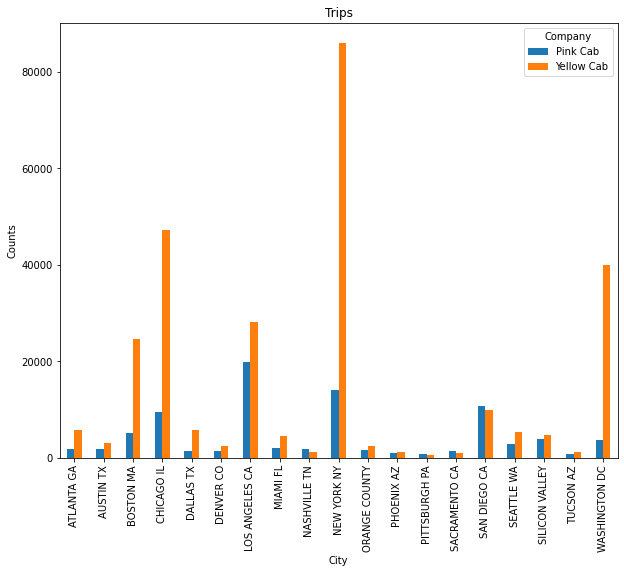

Company         Pink Cab  Yellow Cab
City                                
ATLANTA GA          1762        5795
AUSTIN TX           1868        3028
BOSTON MA           5186       24506
CHICAGO IL          9361       47264
DALLAS TX           1380        5637
DENVER CO           1394        2431
LOS ANGELES CA     19865       28168
MIAMI FL            2002        4452
NASHVILLE TN        1841        1169
NEW YORK NY        13967       85918
ORANGE COUNTY       1513        2469
PHOENIX AZ           864        1200
PITTSBURGH PA        682         631
SACRAMENTO CA       1334        1033
SAN DIEGO CA       10672        9816
SEATTLE WA          2732        5265
SILICON VALLEY      3797        4722
TUCSON AZ            799        1132
WASHINGTON DC       3692       40045


In [102]:
#number of trips per company in each city
counts = Master.groupby(['City','Company']).Transaction_ID.count().unstack()
ax = counts.plot(kind='bar',stacked = False , figsize = (10, 8))
ax.set_title("Trips")
ax.set_ylabel("Counts")
plt.show()
print(counts)

# **Correlative Analysis**

We apply quantitative correlation analysis by drawing the correlation matrix. We can see that KM Traveled has a strong positive correlation with both Price Charged and Cost of Trip. The same goes for Price Charged and Cost of Trip. There is a negative correlation between Customer ID and both Population and Users. This does not tell anything as Customer ID is useless (anonymous). Also, ProfitPercentage has a strong positive correlation with ProfitPerKm.

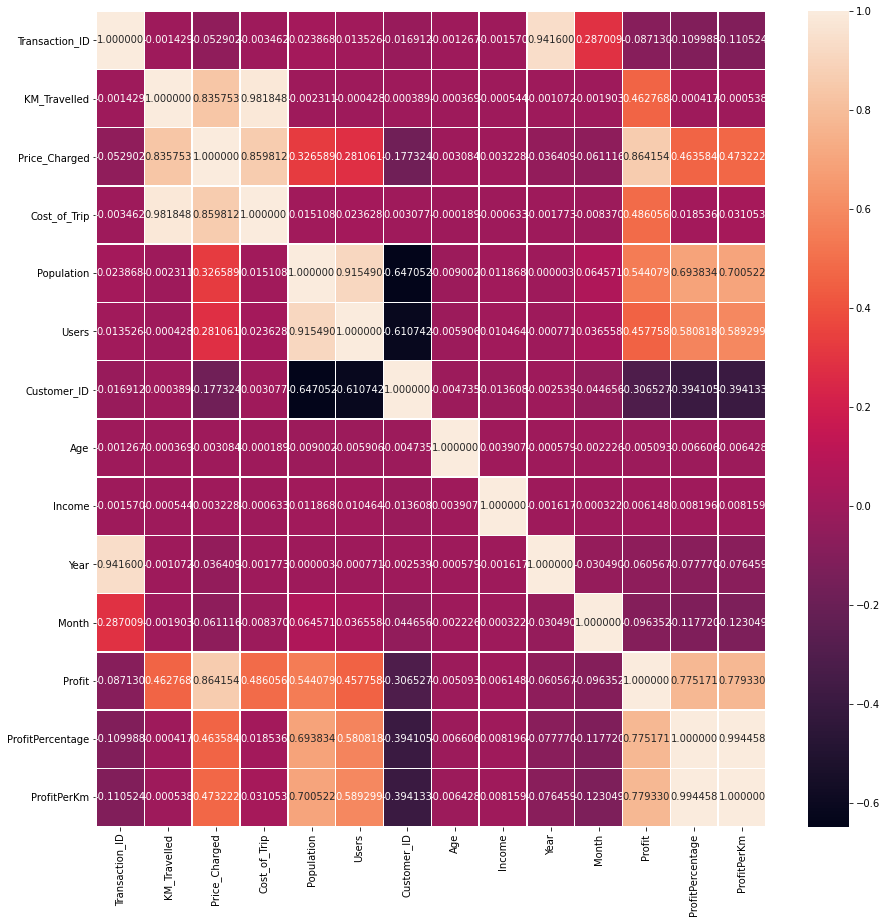

In [86]:
fig, ax = plt.subplots(figsize=(15,15))  
corr = Master.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths = 0.5,
            annot = True , fmt = 'f')

# **Profit Analysis**

# **Profit per Year for each Company**

You can see from the graph that Yellow Cab company has gained profits larger than Pink Cab for all the years. Between 2016 and 2017, there was an increase of about 19.02% for Yellow and 18.71% for Pink. Between 2017 and 2018, there was a drop in the profits for both comapnies, a loss of about 18.46% for Yellow and 23.15% for Pink. The highest profit is in 2017, with profit margin of about 716.75% for Yellow with respect to Pink.

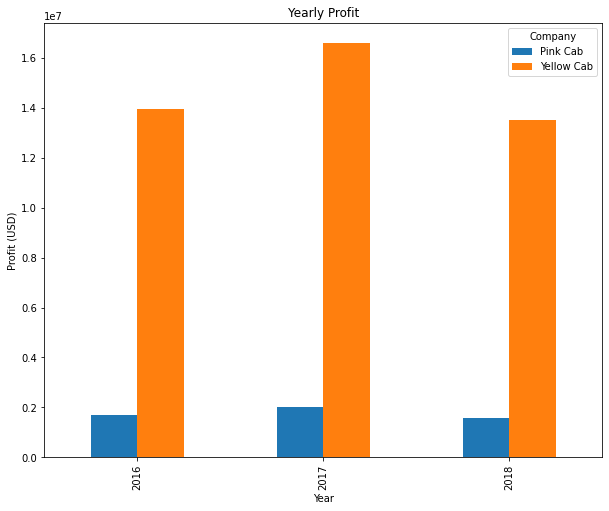

Company     Pink Cab    Yellow Cab
Year                              
2016     1713511.224  1.392700e+07
2017     2033654.908  1.657598e+07
2018     1560162.189  1.351740e+07


In [87]:
#Profit Per Year for the two companies
counts = Master.groupby(['Year','Company']).Profit.sum().unstack()
ax = counts.plot(kind='bar',stacked = False , figsize = (10 , 8))
ax.set_title("Yearly Profit")
ax.set_ylabel("Profit (USD)")
plt.show()
print(counts)

# **Total Profit per City**

You can see from the graph, most of the Cab industry profits are from New York, Los Angles, Chicago, Boston, and Washington.

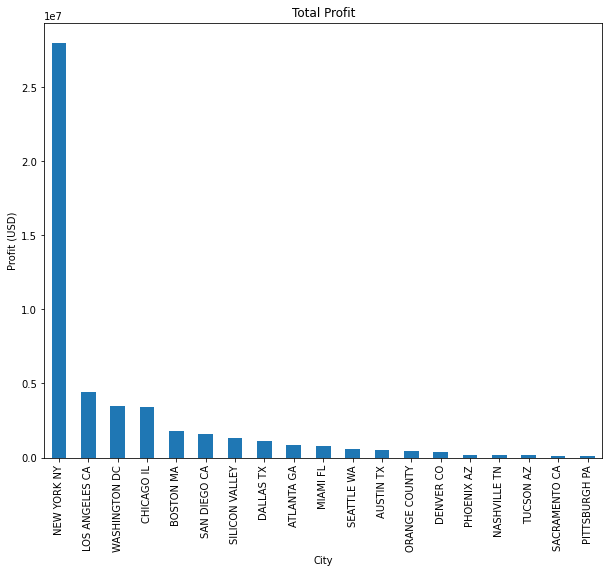

City
NEW YORK NY       2.796256e+07
LOS ANGELES CA    4.411709e+06
WASHINGTON DC     3.492870e+06
CHICAGO IL        3.387313e+06
BOSTON MA         1.768719e+06
SAN DIEGO CA      1.587163e+06
SILICON VALLEY    1.316705e+06
DALLAS TX         1.128733e+06
ATLANTA GA        8.424329e+05
MIAMI FL          7.583012e+05
SEATTLE WA        6.046849e+05
AUSTIN TX         5.267010e+05
ORANGE COUNTY     4.570019e+05
DENVER CO         3.975850e+05
PHOENIX AZ        1.929409e+05
NASHVILLE TN      1.495322e+05
TUCSON AZ         1.402607e+05
SACRAMENTO CA     1.173262e+05
PITTSBURGH PA     8.516596e+04
Name: Profit, dtype: float64


In [88]:
#Profit Per City for the two companies
counts = Master.groupby(['City']).Profit.sum().sort_values(ascending  = False)
ax = counts.plot(kind='bar',stacked = False , figsize = (10 , 8))
ax.set_title("Total Profit")
ax.set_ylabel("Profit (USD)")
plt.show()
print(counts)

# **City Average Profit Percentage**

Both Companies have the highest average profit percentage in New York, but with a significant difference in the margin (104% for Yellow and 44% for Pink).

Also, Yellow Cab has a constant average profit percentage in both Silicon Valley and Dallas (67%).

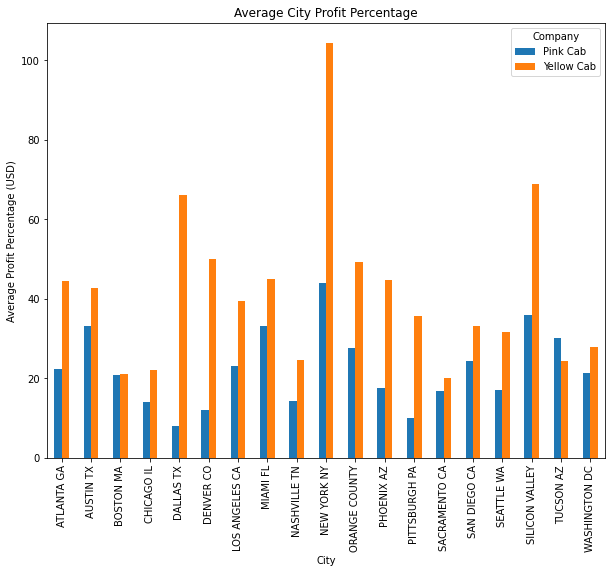

Company          Pink Cab  Yellow Cab
City                                 
ATLANTA GA      22.366576   44.345863
AUSTIN TX       33.124570   42.639859
BOSTON MA       20.682036   20.991244
CHICAGO IL      14.062613   22.053429
DALLAS TX        7.834718   66.155995
DENVER CO       11.961548   49.940618
LOS ANGELES CA  23.113694   39.375101
MIAMI FL        33.004664   44.901656
NASHVILLE TN    14.243584   24.621837
NEW YORK NY     43.993889  104.267068
ORANGE COUNTY   27.625281   49.202086
PHOENIX AZ      17.621781   44.625587
PITTSBURGH PA   10.006572   35.601659
SACRAMENTO CA   16.840577   20.150114
SAN DIEGO CA    24.370124   33.045469
SEATTLE WA      16.926940   31.730163
SILICON VALLEY  35.828903   68.979035
TUCSON AZ       30.074783   24.314928
WASHINGTON DC   21.366713   27.915416


In [104]:
#Average profit percentage per city
counts = Master.groupby(['City','Company']).ProfitPercentage.mean().unstack()
ax = counts.plot(kind='bar',stacked = False , figsize = (10 , 8))
ax.set_title("Average City Profit Percentage")
ax.set_ylabel("Average Profit Percentage (USD)")
plt.show()
print(counts)

# **Hypothesis**

 Does the profit of each company change yearly for each city ?

# **Yearly Average Profits per City**


From the graph, we can see that the two companies maintained a fixed distribution of the average profit over the three years, but there are minimal fluctuations. The highest average is about 350 Dollars in 2016 for Yellow Cab in New York City, while it is about 109 Dollars for Pink Cab.

        Company            City  ...  ProfitPercentage  ProfitPerKm
0      Pink Cab      ATLANTA GA  ...         28.345803     3.060475
3      Pink Cab       AUSTIN TX  ...         33.366251     3.625389
6      Pink Cab       BOSTON MA  ...         25.245975     2.737098
9      Pink Cab      CHICAGO IL  ...         16.688376     1.796721
12     Pink Cab       DALLAS TX  ...          9.514486     1.014503
15     Pink Cab       DENVER CO  ...         14.520488     1.548866
18     Pink Cab  LOS ANGELES CA  ...         26.253504     2.844208
21     Pink Cab        MIAMI FL  ...         35.106270     3.826497
24     Pink Cab    NASHVILLE TN  ...         14.651990     1.560742
27     Pink Cab     NEW YORK NY  ...         45.758692     4.984111
30     Pink Cab   ORANGE COUNTY  ...         27.218519     2.963134
33     Pink Cab      PHOENIX AZ  ...         22.237129     2.414428
36     Pink Cab   PITTSBURGH PA  ...         10.030556     1.084346
39     Pink Cab   SACRAMENTO CA  ...         17.

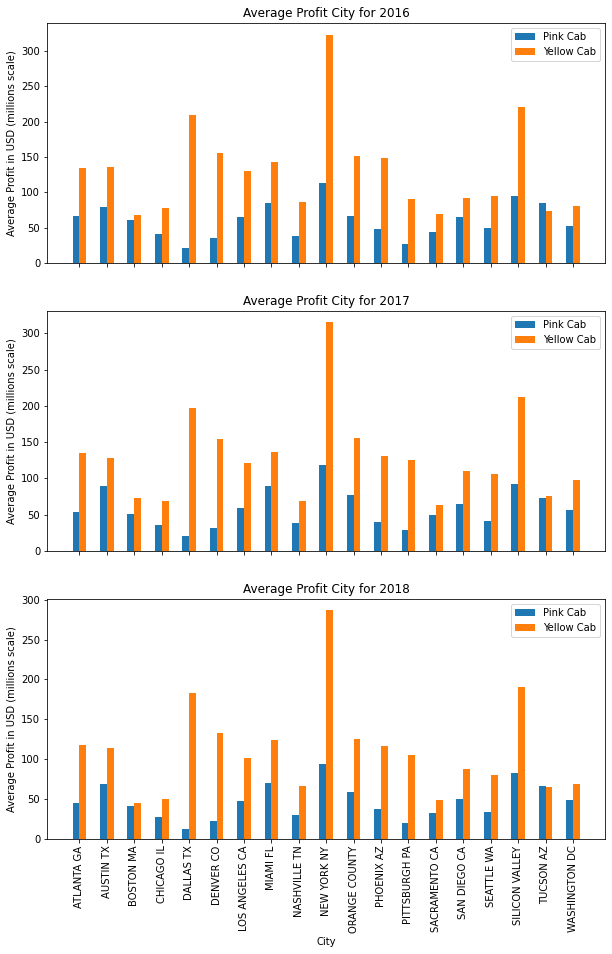

     Year     Company           City     Profit
0    2016    Pink Cab     ATLANTA GA  66.554637
1    2017    Pink Cab     ATLANTA GA  54.112231
2    2018    Pink Cab     ATLANTA GA  44.515703
3    2016    Pink Cab      AUSTIN TX  79.077316
4    2017    Pink Cab      AUSTIN TX  88.761677
..    ...         ...            ...        ...
109  2017  Yellow Cab      TUCSON AZ  75.478238
110  2018  Yellow Cab      TUCSON AZ  65.306885
111  2016  Yellow Cab  WASHINGTON DC  80.188986
112  2017  Yellow Cab  WASHINGTON DC  97.934330
113  2018  Yellow Cab  WASHINGTON DC  68.539427

[114 rows x 4 columns]


In [107]:
#Average Profit Per City for the two companies in each year.

def profit_city_year(Master):

  Master['Profit'] = Master['Price_Charged'] - Master['Cost_of_Trip']
  new_df = Master.groupby(["Company" , "City" , "Year"] , as_index = False).mean('Profit')

  new_2016 = new_df[new_df['Year'] ==2016]
  new_2017 = new_df[new_df['Year'] ==2017]
  new_2018 = new_df[new_df['Year'] ==2018]
  print(new_2016)
  #plt.figure(figsize = (20 , 20))
  fig, (ax1, ax2 , ax3) = plt.subplots(figsize = (10 , 15) , nrows = 3 , ncols = 1,  sharex = True  )
  x = np.arange(19)
  width = 0.25
  
  rec1 = ax1.bar(x , new_2016['Profit'].iloc[0:19] , width , label = "Pink Cab" , align = 'center')
  rec2 = ax1.bar(x+width , new_2016['Profit'].iloc[19:38] , width , label = "Yellow Cab" , align = 'center')
  ax1.set_ylabel("Average Profit in USD (millions scale)")
  #ax.set_xlabel("City")
  ax1.set_title("Average Profit City for 2016")
  ax1.legend()
  
  rec1 = ax2.bar(x , new_2017['Profit'].iloc[0:19] , width , label = "Pink Cab" , align = 'center')
  rec2 = ax2.bar(x+width , new_2017['Profit'].iloc[19:38] , width , label = "Yellow Cab" , align = 'center')
  ax2.set_ylabel("Average Profit in USD (millions scale)")
  #ax.set_xlabel("City")
  ax2.set_title("Average Profit City for 2017")
  ax2.legend()

  rec1 = ax3.bar(x , new_2018['Profit'].iloc[0:19] , width , label = "Pink Cab" , align = 'center')
  rec2 = ax3.bar(x+width , new_2018['Profit'].iloc[19:38] , width , label = "Yellow Cab" , align = 'center')
  ax3.set_ylabel("Average Profit in USD (millions scale)")
  ax3.set_xlabel("City")
  ax3.set_title("Average Profit City for 2018")
  ax3.legend()

  
  ax3.set_xticks(x+width*0.5)
  ax3.set_xticklabels([c for c in new_2018["City"]] , rotation = 90)
 # ax.legend()
  plt.show()

  print(new_df[['Year' , 'Company' , 'City' , 'Profit']])


profit_city_year(Master)





# **Hypothesis**

What percentage of contribution in city average profit for males and females?

# **Gender Contribution to City Average Profit**

On average, both genders contribute equally to the average profit of city.

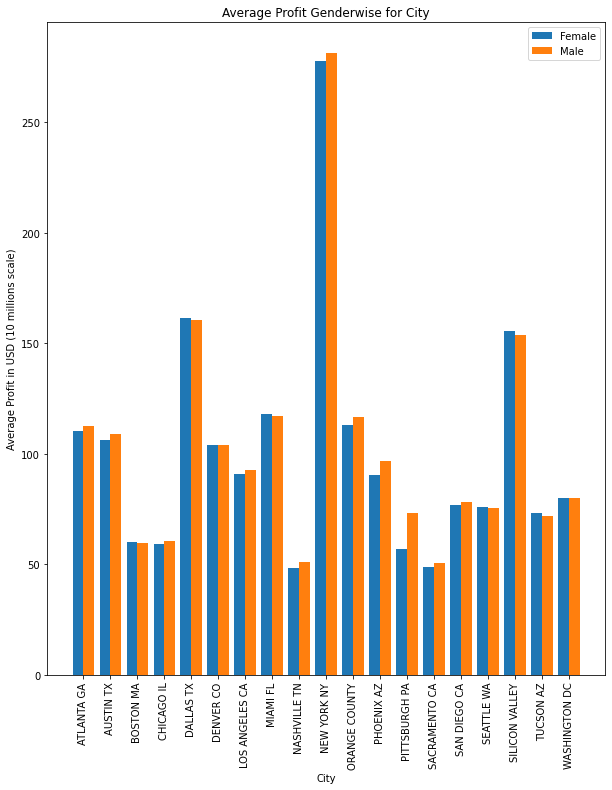

              City  Gender      Profit
0       ATLANTA GA  Female  110.308104
1        AUSTIN TX  Female  106.221072
2        BOSTON MA  Female   59.816166
3       CHICAGO IL  Female   59.048851
4        DALLAS TX  Female  161.305019
5        DENVER CO  Female  104.004852
6   LOS ANGELES CA  Female   90.607309
7         MIAMI FL  Female  117.884753
8     NASHVILLE TN  Female   48.017898
9      NEW YORK NY  Female  277.925960
10   ORANGE COUNTY  Female  112.785733
11      PHOENIX AZ  Female   90.392621
12   PITTSBURGH PA  Female   57.035426
13   SACRAMENTO CA  Female   48.729084
14    SAN DIEGO CA  Female   76.881610
15      SEATTLE WA  Female   75.847311
16  SILICON VALLEY  Female  155.575093
17       TUCSON AZ  Female   73.362445
18   WASHINGTON DC  Female   80.067669
19      ATLANTA GA    Male  112.612967
20       AUSTIN TX    Male  108.879198
21       BOSTON MA    Male   59.371957
22      CHICAGO IL    Male   60.309706
23       DALLAS TX    Male  160.443870
24       DENVER CO    Mal

In [108]:
#Contribution of gender to average profit in each city
def gender_contrib(Master):

  #Master['Profit'] = Master['Price Charged'] - Master['Cost of Trip']
  new_df = Master.groupby(["Gender" , "City"] , as_index = False).mean('Profit')
 
  
  fig , ax = plt.subplots(figsize = (10 , 12))
  x = np.arange(19)
  width = 0.4
  rec1 = ax.bar(x , new_df['Profit'].iloc[0:19] , width , label = "Female" , align = 'center')
  rec2 = ax.bar(x + width , new_df['Profit'].iloc[19:38] , width , label = "Male" , align = 'center')
  ax.set_ylabel("Average Profit in USD (10 millions scale)")
  ax.set_xlabel("City")
  ax.set_title("Average Profit Genderwise for City")
  ax.set_xticks(x+width*0.5)
  ax.set_xticklabels([c for c in new_df["City"]] , rotation = 90)
  ax.legend()
  plt.show()
  print(new_df[['City' , 'Gender' , 'Profit']])

gender_contrib(Master)

# **Hypothesis**

Is there any seasonality in the profit per month for each comapny?

# **Average Monthly Profit**

Yellow Cab reaches its highest average profit during May (212.56 Dollars), while Pink Cab reaches its lowest (34 Dollars). All in all , Yellow Cab has a better average profit in all months.

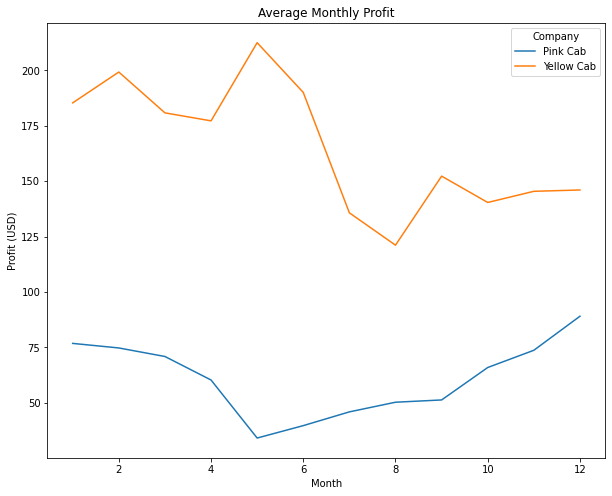

Company   Pink Cab  Yellow Cab
Month                         
1        76.736129  185.374826
2        74.678906  199.302085
3        70.825615  180.865227
4        60.205265  177.254502
5        33.994741  212.557685
6        39.597623  190.079552
7        45.809575  135.709081
8        50.168148  121.110536
9        51.194380  152.287874
10       65.850706  140.392116
11       73.632546  145.427395
12       89.008786  146.033211


In [92]:
counts = Master.groupby(['Month' , 'Company' ]).Profit.mean().unstack()
ax = counts.plot(kind='line',stacked = False , figsize = (10 , 8))
ax.set_title("Average Monthly Profit")
ax.set_ylabel("Average Profit (USD)")
plt.show()
print(counts)


# **Hypothesis**

Does demand tend to increase over time?

Let us study few plots to look at the demand (number of trips) in each year and month.

# **Yearly Company Trips**

we see that there is an increase in number of trips of about 19.4% for Yellow Cab and 20.9% for Pink Cab between 2016 and 2017.

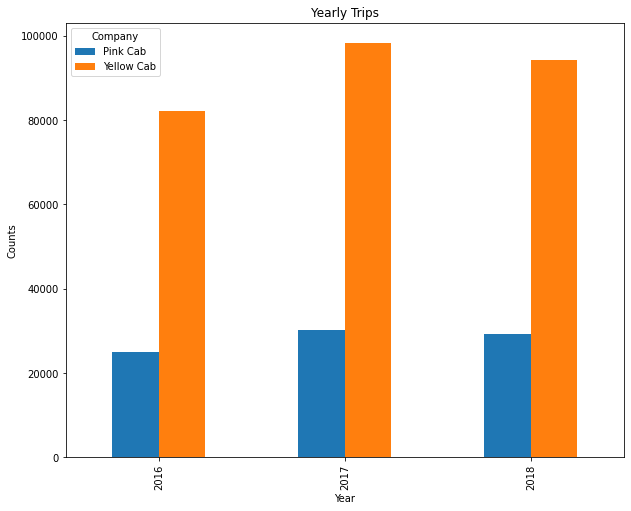

Company  Pink Cab  Yellow Cab
Year                         
2016        25080       82239
2017        30321       98189
2018        29310       94253


In [109]:
counts = Master.groupby(['Year','Company']).Transaction_ID.count().unstack()
ax = counts.plot(kind='bar',stacked = False , figsize = (10 , 8))
ax.set_title("Yearly Trips")
ax.set_ylabel("Counts")
plt.show()
print(counts)

# **Monthly Company Trips**

We can see that in the three years, there is almost a steady increase in number of trips for both companies. All in all, people tend to request a Yellow Cab taxi more often.

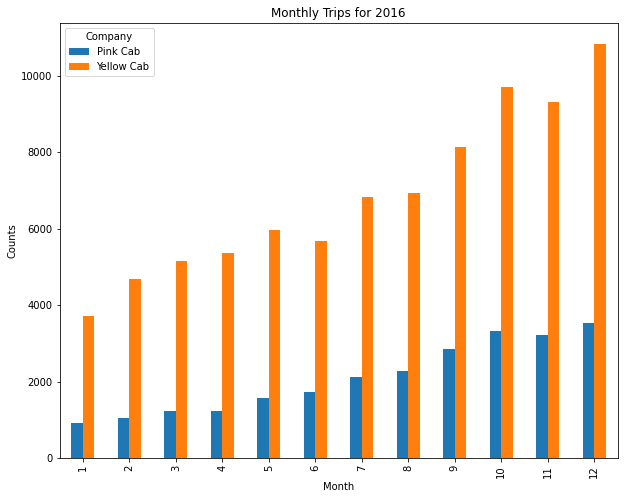

Company  Pink Cab  Yellow Cab
Month                        
1             927        3719
2            1050        4674
3            1231        5146
4            1240        5360
5            1567        5967
6            1730        5667
7            2125        6814
8            2272        6918
9            2854        8130
10           3334        9697
11           3229        9320
12           3521       10827


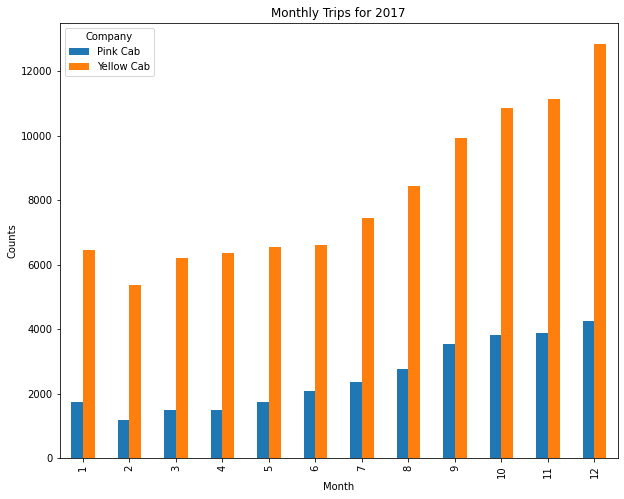

Company  Pink Cab  Yellow Cab
Month                        
1            1734        6454
2            1195        5358
3            1503        6219
4            1487        6372
5            1724        6531
6            2083        6613
7            2359        7438
8            2766        8439
9            3537        9922
10           3807       10852
11           3879       11145
12           4247       12846


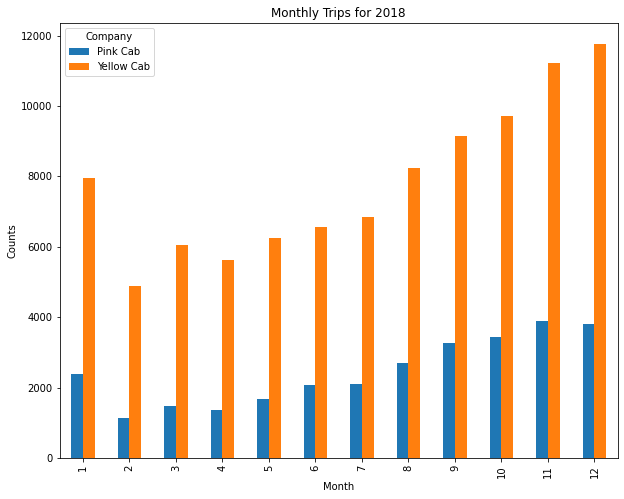

Company  Pink Cab  Yellow Cab
Month                        
1            2396        7944
2            1130        4900
3            1489        6058
4            1356        5619
5            1669        6243
6            2064        6556
7            2106        6834
8            2701        8227
9            3267        9149
10           3435        9727
11           3897       11230
12           3800       11766


In [110]:
counts_2016 = Master[Master['Year']== 2016]
counts_2017 = Master[Master['Year']== 2017]
counts_2018 = Master[Master['Year']== 2018]

counts2016 = counts_2016.groupby(['Month','Company']).Transaction_ID.count().unstack("Company")
ax = counts2016.plot(kind='bar',stacked = False , figsize = (10 , 8))
ax.set_title("Monthly Trips for 2016")
ax.set_ylabel("Counts")
plt.show()
print(counts2016)


counts2017 = counts_2017.groupby(['Month','Company']).Transaction_ID.count().unstack("Company")
ax = counts2017.plot(kind='bar',stacked = False , figsize = (10 , 8))
ax.set_title("Monthly Trips for 2017")
ax.set_ylabel("Counts")
plt.show()
print(counts2017)

counts2018 = counts_2018.groupby(['Month','Company']).Transaction_ID.count().unstack("Company")
ax = counts2018.plot(kind='bar',stacked = False , figsize = (10 , 8))
ax.set_title("Monthly Trips for 2018")
ax.set_ylabel("Counts")
plt.show()
print(counts2018)

# **Hypothesis**

Which company is travelling more distances?

# **Kilometers Travelled by Company**

The average distance travelled by both companies is the same.

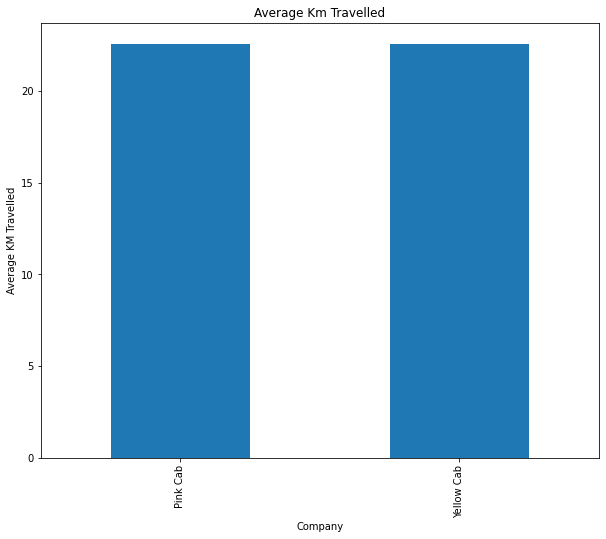

Company
Pink Cab      22.559917
Yellow Cab    22.569517
Name: KM_Travelled, dtype: float64


In [111]:
counts = Master.groupby(['Company']).KM_Travelled.mean()#.unstack("Company")
ax = counts.plot(kind='bar',stacked = False , figsize = (10 , 8))
ax.set_title("Average Km Travelled")
ax.set_ylabel("Average KM Travelled")
plt.show()
print(counts)

# **Kilometers Travelled each Month**

Both Companies have the same average distance in all months.

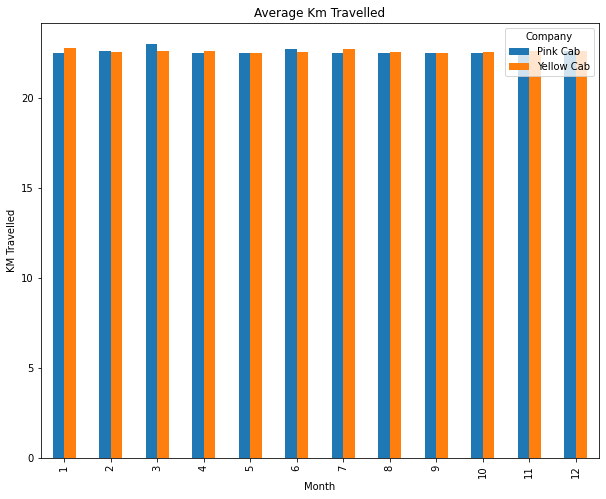

Company   Pink Cab  Yellow Cab
Month                         
1        22.491693   22.743680
2        22.580987   22.514041
3        22.988615   22.588583
4        22.503098   22.582103
5        22.478395   22.493946
6        22.728935   22.551023
7        22.504636   22.689308
8        22.508783   22.557366
9        22.498595   22.481982
10       22.496822   22.520269
11       22.526004   22.584162
12       22.603079   22.571087


In [96]:
counts = Master.groupby(['Month' , 'Company']).KM_Travelled.mean().unstack()
ax = counts.plot(kind='bar',stacked = False , figsize = (10 , 8))
ax.set_title("Average Km Travelled")
ax.set_ylabel("Average KM Travelled")
plt.show()
print(counts)

# **Hypothesis**

Does the two companies maintain the same average profit per Km for all cities?

# **Average Profit/Km per City**

Yellow Cab range is between 2.6 and 13.7 Dollars (426.9% increase), while the range for Pink Cab is between 0.8 and 4.8 Dollars (500% increase).

In NEW YORK city, profit margin of Yellow Cab is 185.4% with respect to the Pink Cab.

in DALLAS city, profit margin of Yellow Cab is 987.5% with respect to the Pink Cab.


in TUCSON , both companies maintain the same profit per Km.

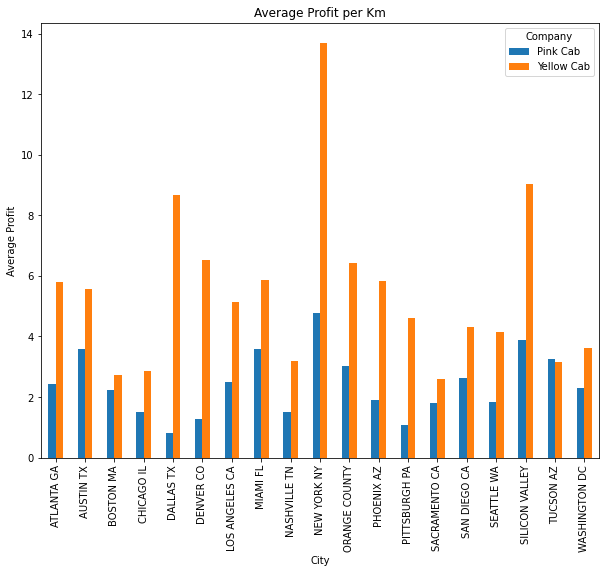

Company         Pink Cab  Yellow Cab
City                                
ATLANTA GA      2.418367    5.793907
AUSTIN TX       3.601619    5.573738
BOSTON MA       2.234623    2.724566
CHICAGO IL      1.508437    2.862147
DALLAS TX       0.825393    8.659813
DENVER CO       1.276010    6.538332
LOS ANGELES CA  2.501389    5.143755
MIAMI FL        3.601181    5.876724
NASHVILLE TN    1.521093    3.199816
NEW YORK NY     4.790525   13.680714
ORANGE COUNTY   3.008943    6.439300
PHOENIX AZ      1.894585    5.825460
PITTSBURGH PA   1.066107    4.610267
SACRAMENTO CA   1.815109    2.608064
SAN DIEGO CA    2.638450    4.306747
SEATTLE WA      1.825484    4.133996
SILICON VALLEY  3.898292    9.046897
TUCSON AZ       3.267249    3.156657
WASHINGTON DC   2.308069    3.633461


In [97]:
counts = Master.groupby(['City' , 'Company']).ProfitPerKm.mean().unstack()
ax = counts.plot(kind='bar',stacked = False , figsize = (10 , 8))
ax.set_title("Average Profit per Km")
ax.set_ylabel("Average Profit")
plt.show()
print(counts)

# **Hypothesis**

On average, what is the change in the profit per Km yearwise and monthwise?

# **Average Profit/Km per Year**

Both Companies Maintained a fixed profit per Km for 2016 and 2017. In 2018, the profit deacresed by 14.7% for Yellow Cab and 20% for Pink Cab.

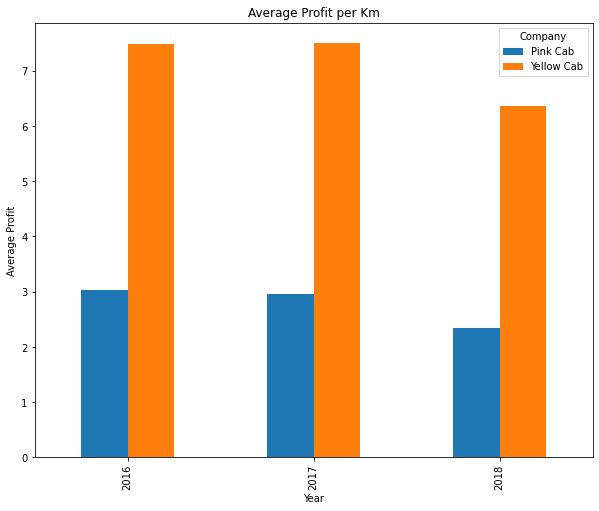

Company  Pink Cab  Yellow Cab
Year                         
2016     3.026813    7.489847
2017     2.962883    7.494612
2018     2.350447    6.364805


In [98]:
counts = Master.groupby(['Year' , 'Company']).ProfitPerKm.mean().unstack()
ax = counts.plot(kind='bar',stacked = False , figsize = (10 , 8))
ax.set_title("Average Profit per Km")
ax.set_ylabel("Average Profit")
plt.show()
print(counts)

# **Average Profit/Km per Month**

There is a high fluctations for Yellow Cab (range is 5 to 9 Dollars), while Pink Cab range is small (between 1 and 4 dollars).

there is a decrease in the average profit during the first five months for Pink Cab. After that, it starts increasing till the end of the year.


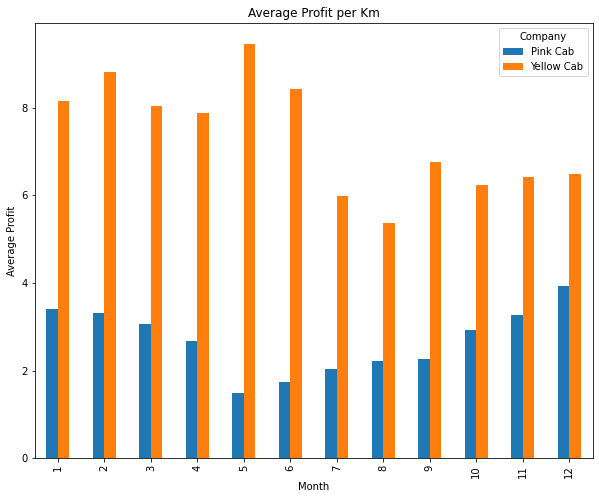

Company  Pink Cab  Yellow Cab
Month                        
1        3.404192    8.167712
2        3.313398    8.822241
3        3.059808    8.048030
4        2.673542    7.874125
5        1.497252    9.461404
6        1.735244    8.436062
7        2.038918    5.991807
8        2.226676    5.367933
9        2.264885    6.756176
10       2.925727    6.232133
11       3.263209    6.416993
12       3.923307    6.495423


In [99]:
counts = Master.groupby(['Month' , 'Company']).ProfitPerKm.mean().unstack()
ax = counts.plot(kind='bar',stacked = False , figsize = (10 , 8))
ax.set_title("Average Profit per Km")
ax.set_ylabel("Average Profit")
plt.show()
print(counts)

# **Hypothesis**

Who has the highest average income withe respect to age and gender?

# **Average Income Genderwise and Agewise**

According to the graph, we can see that the average income is almost constant (with minimum fluctuations) and is ranging between 14k and 15k (except for female at age of 44 with an average income of 12k).

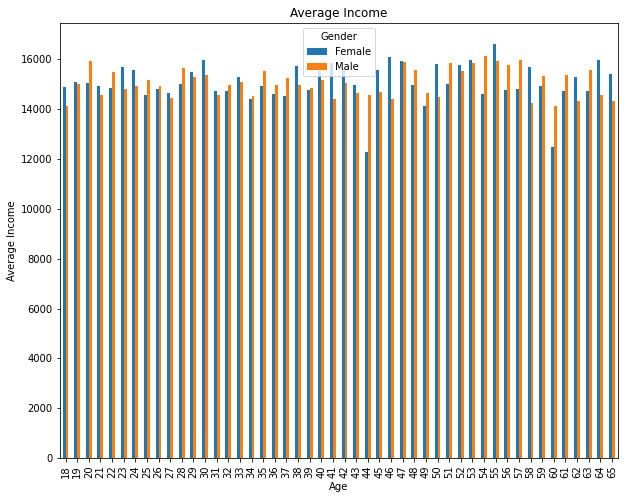

Gender        Female          Male
Age                               
18      14881.966617  14145.305388
19      15096.404933  15027.055207
20      15056.500447  15920.875038
21      14932.317946  14578.338568
22      14854.033685  15501.001095
23      15696.517269  14828.027630
24      15576.956256  14932.640805
25      14568.790913  15153.362654
26      14789.285031  14909.986852
27      14631.466578  14448.027524
28      14990.701257  15661.914272
29      15505.520456  15282.969830
30      15971.994623  15356.516113
31      14745.277189  14554.920764
32      14707.907692  14974.979287
33      15282.322509  15080.075957
34      14395.525138  14539.338577
35      14942.405292  15533.330559
36      14619.114465  14973.610439
37      14511.006627  15263.013585
38      15739.872910  14958.001713
39      14749.499384  14842.211833
40      15541.932346  15162.176982
41      15843.868929  14394.173588
42      15634.091228  15061.890766
43      14984.265615  14655.773458
44      12285.017577

In [112]:
counts = Master.groupby(['Age' , 'Gender']).Income.mean().unstack()
ax = counts.plot(kind='bar',stacked = False , figsize = (10 , 8))
ax.set_title("Average Income")
ax.set_ylabel("Average Income")
plt.show()
print(counts)